In [1]:
# The basic libraries
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pydotplus
import seaborn as sns # for visualization
import statsmodels.api as sm
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

from sklearn import tree
from sklearn import neighbors, datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from statsmodels.formula.api import ols

# Error Handling
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# Neural Networks
import tensorflow as tf # This tells Colab that we are using TensorFlow
from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense
print("Current TensorFlow version is", tf.__version__)

#Clustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
plt.style.use('ggplot')

# EDA
#!pip install -U ydata-profiling[notebook,unicode]
#from ydata_profiling import ProfileReport # Now we load the package

Current TensorFlow version is 2.14.0


In [2]:
ev = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/Electric_Vehicle_Population_Data_2023Final.csv")
ev.head()

,VIN_(1-10),County,City,State,PostalCode,ModelYear,Make,Model,ElectricVehicleType,ElectricRangeInMiles,BaseMSRP,Battery_kWh,DestinationFee,Min_Charging_Station_Level,Max2023ResaleValue,Min2023ResaleValue
0,WAUUPBFF2G,King,Medina,WA,98039,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52
1,WAUTPBFF4G,King,Seattle,WA,98125,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52
2,WAUTPBFF2G,King,Seattle,WA,98115,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52
3,WAUSPBFF4G,Snohomish,Bothell,WA,98021,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52
4,WAUTPBFF8G,King,Seattle,WA,98103,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52


In [3]:
print(ev.shape)
ev = ev[ev['ElectricRangeInMiles'] > 0]
print(ev.shape)
ev = ev.set_index('Make')
ev.head()

(98312, 16)
(98208, 16)


,VIN_(1-10),County,City,State,PostalCode,ModelYear,Model,ElectricVehicleType,ElectricRangeInMiles,BaseMSRP,Battery_kWh,DestinationFee,Min_Charging_Station_Level,Max2023ResaleValue,Min2023ResaleValue
Make,,,,,,,,,,,,,,,
AUDI,WAUUPBFF2G,King,Medina,WA,98039,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52
AUDI,WAUTPBFF4G,King,Seattle,WA,98125,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52
AUDI,WAUTPBFF2G,King,Seattle,WA,98115,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52
AUDI,WAUSPBFF4G,Snohomish,Bothell,WA,98021,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52
AUDI,WAUTPBFF8G,King,Seattle,WA,98103,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52


In [5]:
ev = ev.drop(['BENTLEY','WHEEGO ELECTRIC CARS','AZURE DYNAMICS'],axis=0)
print(ev.shape)

(98195, 15)


In [6]:
# ev1 = ev.set_index('Make')
# ev1 = ev1.drop(['BENTLEY','WHEEGO ELECTRIC CARS','AZURE DYNAMICS'],axis=0)

In [28]:
ev['Make'] = ev.index
ev.reset_index(inplace=True,drop=True)
ev.head()

,VIN_(1-10),County,City,State,PostalCode,ModelYear,Model,ElectricVehicleType,ElectricRangeInMiles,BaseMSRP,Battery_kWh,DestinationFee,Min_Charging_Station_Level,Max2023ResaleValue,Min2023ResaleValue,Make
0,WAUUPBFF2G,King,Medina,WA,98039,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,AUDI
1,WAUTPBFF4G,King,Seattle,WA,98125,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,AUDI
2,WAUTPBFF2G,King,Seattle,WA,98115,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,AUDI
3,WAUSPBFF4G,Snohomish,Bothell,WA,98021,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,AUDI
4,WAUTPBFF8G,King,Seattle,WA,98103,2016,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,AUDI


In [8]:
ev.groupby(['Min_Charging_Station_Level']).median()

,PostalCode,ModelYear,ElectricRangeInMiles,BaseMSRP,Battery_kWh,DestinationFee,Max2023ResaleValue,Min2023ResaleValue
Min_Charging_Station_Level,,,,,,,,
Level 1--110V,98198.0,2017.0,32.0,35000.0,16.0,765.00,22779.26,14806.52
Level 2--240V,98118.0,2019.0,220.0,42895.0,60.0,1050.00,29992.53,22494.40
"Level 2--240V, Level 3--480V",98109.0,2021.0,303.0,60190.0,75.0,2650.12,45142.54,33856.91
Level 3--480V,98087.0,2022.0,330.0,65990.0,75.0,2882.24,49492.52,37119.39


In [10]:
ev1 = ev[['BaseMSRP','ElectricRangeInMiles','Battery_kWh','Max2023ResaleValue']]
train,test = train_test_split(ev1,test_size=0.2)
print('Number of rows in train is - {0}'.format(train.shape[0]))
print('Number of rows in test is - {0} '.format(test.shape[0]))

Number of rows in train is - 78556
Number of rows in test is - 19639 


<Axes: title={'center': 'ElectricRangeInMiles'}, xlabel='Min_Charging_Station_Level'>

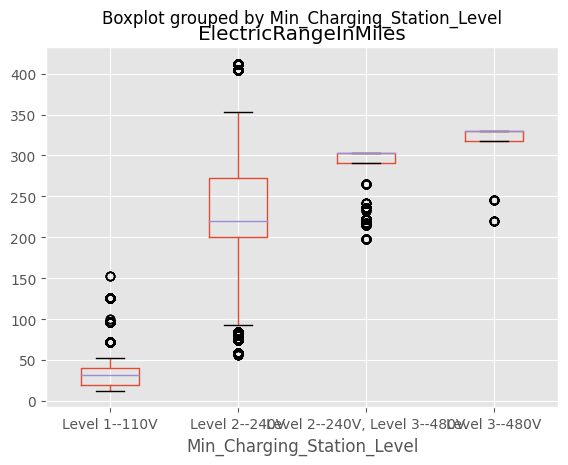

In [51]:
ev.boxplot(column='ElectricRangeInMiles', by='Min_Charging_Station_Level')

In [12]:
X = ev[['BaseMSRP','ElectricRangeInMiles','Battery_kWh']] # Now we have values from three different independent attributes stored in X
y = ev['Make']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (78556, 3)
y_train shape: (78556,)


In [14]:
# Model with k=1

model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("Test set score: {:.4f}".format(model1.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Test set score: 1.0000
              precision    recall  f1-score   support

        AUDI       1.00      1.00      1.00       485
         BMW       1.00      1.00      1.00      1064
    CADILLAC       1.00      1.00      1.00        22
   CHEVROLET       1.00      1.00      1.00      2117
    CHRYSLER       1.00      1.00      1.00       405
      FISKER       1.00      1.00      1.00         1
        FORD       1.00      1.00      1.00      1331
         KIA       1.00      1.00      1.00       109
        MINI       1.00      1.00      1.00        24
      NISSAN       1.00      1.00      1.00      2540
     PORSCHE       1.00      1.00      1.00         2
      SUBARU       1.00      1.00      1.00        15
       TESLA       1.00      1.00      1.00     11472
       VOLVO       1.00      1.00      1.00        52

    accuracy                           1.00     19639
   macro avg       1.00      1.00      1.00     19639
weighted avg       1.00      1.00      1.00     19639



In [15]:
# Model with k=25

model25 = KNeighborsClassifier(n_neighbors = 25)
model25.fit(X_train, y_train)
y_pred25 = model25.predict(X_test)
print("Test set score: {:.4f}".format(model25.score(X_test, y_test)))
print(classification_report(y_test, y_pred25))

Test set score: 0.9990
              precision    recall  f1-score   support

        AUDI       1.00      0.99      0.99       485
         BMW       1.00      0.99      1.00      1064
    CADILLAC       1.00      0.82      0.90        22
   CHEVROLET       1.00      1.00      1.00      2117
    CHRYSLER       1.00      1.00      1.00       405
      FISKER       1.00      1.00      1.00         1
        FORD       1.00      1.00      1.00      1331
         KIA       1.00      1.00      1.00       109
        MINI       1.00      1.00      1.00        24
      NISSAN       1.00      1.00      1.00      2540
     PORSCHE       1.00      0.50      0.67         2
      SUBARU       1.00      1.00      1.00        15
       TESLA       1.00      1.00      1.00     11472
       VOLVO       0.96      1.00      0.98        52

    accuracy                           1.00     19639
   macro avg       1.00      0.95      0.97     19639
weighted avg       1.00      1.00      1.00     19639



In [16]:
# Model with k=200

model200 = KNeighborsClassifier(n_neighbors = 200)
model200.fit(X_train, y_train)
y_pred200 = model200.predict(X_test)
print("Test set score: {:.4f}".format(model200.score(X_test, y_test)))
print(classification_report(y_test, y_pred200))

Test set score: 0.9835
              precision    recall  f1-score   support

        AUDI       0.94      0.94      0.94       485
         BMW       0.96      0.92      0.94      1064
    CADILLAC       0.00      0.00      0.00        22
   CHEVROLET       0.96      0.99      0.98      2117
    CHRYSLER       1.00      0.87      0.93       405
      FISKER       0.00      0.00      0.00         1
        FORD       0.96      0.95      0.95      1331
         KIA       1.00      0.86      0.93       109
        MINI       1.00      1.00      1.00        24
      NISSAN       1.00      1.00      1.00      2540
     PORSCHE       0.00      0.00      0.00         2
      SUBARU       0.00      0.00      0.00        15
       TESLA       0.99      1.00      1.00     11472
       VOLVO       0.58      0.65      0.61        52

    accuracy                           0.98     19639
   macro avg       0.67      0.66      0.66     19639
weighted avg       0.98      0.98      0.98     19639



In [17]:
ins_naivebayes = GaussianNB()
ins_naivebayes.fit(X_train, y_train)
ins_predictions = ins_naivebayes.predict(X_test)
accuracy_score(y_test, ins_predictions)

0.8030958806456541

In [18]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred25))
print(accuracy_score(y_test,y_pred200))

1.0
0.9990325372982332
0.9834512958908295


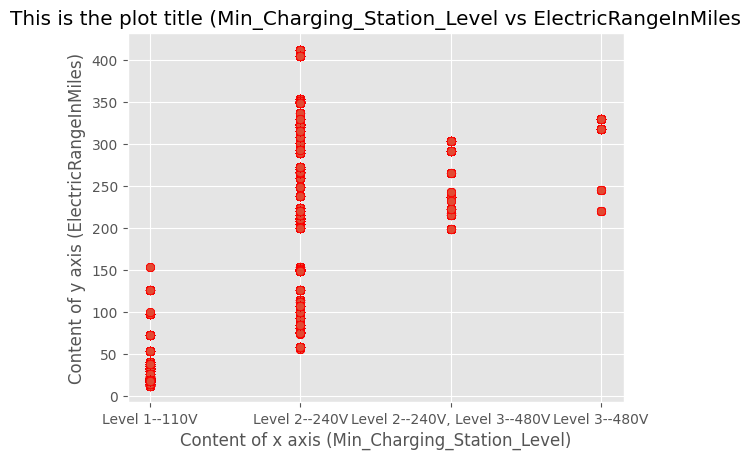

In [59]:
# Setting up the x and y axes of the plot
x = ev[('Min_Charging_Station_Level')]
y = ev[('ElectricRangeInMiles')]

# Building the plot with red outlines for better visibility
plt.scatter(x, y, edgecolors='r')

# NO PLOT WITHOUT LABELS AND TITLE--EVER!!!!!!!
plt.xlabel('Content of x axis (Min_Charging_Station_Level)')
plt.ylabel('Content of y axis (ElectricRangeInMiles)')
plt.title('This is the plot title (Min_Charging_Station_Level vs ElectricRangeInMiles')
plt.show()

In [19]:
ev.groupby(['ElectricVehicleType','Min_Charging_Station_Level']).median()

PostalCode  \
ElectricVehicleType                    Min_Charging_Station_Level                 
Battery Electric Vehicle (BEV)         Level 2--240V                    98118.0   
                                       Level 2--240V, Level 3--480V     98109.0   
                                       Level 3--480V                    98087.0   
Plug-in Hybrid Electric Vehicle (PHEV) Level 1--110V                    98198.0   

                                                                     ModelYear  \
ElectricVehicleType                    Min_Charging_Station_Level                
Battery Electric Vehicle (BEV)         Level 2--240V                    2019.0   
                                       Level 2--240V, Level 3--480V     2021.0   
                                       Level 3--480V                    2022.0   
Plug-in Hybrid Electric Vehicle (PHEV) Level 1--110V                    2017.0   

                                                                     ElectricRangeInMiles  \
ElectricVehicleType                    Min_Charging_Station_Level                           
Battery Electric Vehicle (BEV)         Level 2--240V                                220.0   
                                       Level 2--240V, Level 3--480V                 303.0   
                                       Level 3--480V                                330.0   
Plug-in Hybrid Electric Vehicle (PHEV) Level 1--110V                                 32.0   

                                                                     BaseMSRP  \
ElectricVehicleType                    Min_Charging_Station_Level               
Battery Electric Vehicle (BEV)         Level 2--240V                  42895.0   
                                       Level 2--240V, Level 3--480V   60190.0   
                                       Level 3--480V                  65990.0   
Plug-in Hybrid Electric Vehicle (PHEV) Level 1--110V                  35000.0   

                                                                     Battery_kWh  \
ElectricVehicleType                    Min_Charging_Station_Level                  
Battery Electric Vehicle (BEV)         Level 2--240V                        60.0   
                                       Level 2--240V, Level 3--480V         75.0   
                                       Level 3--480V                        75.0   
Plug-in Hybrid Electric Vehicle (PHEV) Level 1--110V                        16.0   

                                                                     DestinationFee  \
ElectricVehicleType                    Min_Charging_Station_Level                     
Battery Electric Vehicle (BEV)         Level 2--240V                        1050.00   
                                       Level 2--240V, Level 3--480V         2650.12   
                                       Level 3--480V                        2882.24   
Plug-in Hybrid Electric Vehicle (PHEV) Level 1--110V                         765.00   

                                                                     Max2023ResaleValue  \
ElectricVehicleType                    Min_Charging_Station_Level                         
Battery Electric Vehicle (BEV)         Level 2--240V                           29992.53   
                                       Level 2--240V, Level 3--480V            45142.54   
                                       Level 3--480V                           49492.52   
Plug-in Hybrid Electric Vehicle (PHEV) Level 1--110V                           22779.26   

                                                                     Min2023ResaleValue  
ElectricVehicleType                    Min_Charging_Station_Level                        
Battery Electric Vehicle (BEV)         Level 2--240V                           22494.40  
                                       Level 2--240V, Level 3--480V            33856.91  
                                       Level 3--480V                           37119.39  
Plug-i

In [20]:
y_test.nunique()

14

In [62]:
X = ev[['BaseMSRP','ElectricRangeInMiles','Battery_kWh']]
y = ev['Make']

The optimal number of neighbors is 93


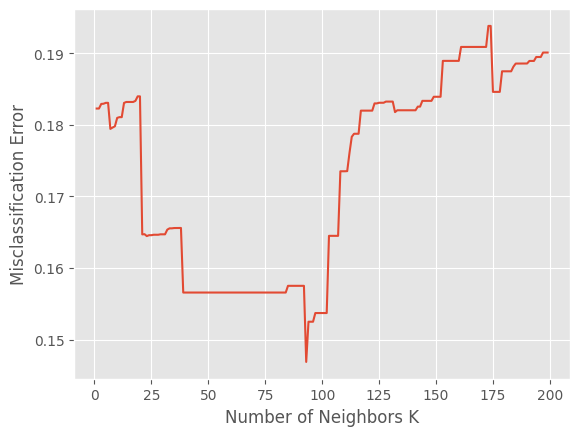

In [63]:
# # To determine how to pick k, we are first creating a list of potential k values
# klist = list(range(1,200,1)) # Our list goes from 1 to 50 in increments of 2

# cv_scores = []
# for k in klist:
#     model10 = neighbors.KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(model10, X, y, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())

# # Changing to misclassification error
# errors = 1- np.array(cv_scores)

# optimal_k = klist[np.argmin(errors)]
# print("The optimal number of neighbors is {}".format(optimal_k))

# # plot misclassification error vs k
# plt.plot(klist, errors)
# plt.xlabel('Number of Neighbors K')
# plt.ylabel('Misclassification Error')
# plt.show()

In [65]:
bins = np.linspace(ev.BaseMSRP.min(),ev.BaseMSRP.max(),4)
labels = ['small', 'medium', 'high']
ev['bins'] = pd.cut(ev['BaseMSRP'], bins=bins, labels=labels, include_lowest=True)
ev.head()

,VIN_(1-10),County,City,State,PostalCode,ModelYear,Make,Model,ElectricVehicleType,ElectricRangeInMiles,BaseMSRP,Battery_kWh,DestinationFee,Min_Charging_Station_Level,Max2023ResaleValue,Min2023ResaleValue,bins
0,WAUUPBFF2G,King,Medina,WA,98039,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,small
1,WAUTPBFF4G,King,Seattle,WA,98125,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,small
2,WAUTPBFF2G,King,Seattle,WA,98115,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,small
3,WAUSPBFF4G,Snohomish,Bothell,WA,98021,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,small
4,WAUTPBFF8G,King,Seattle,WA,98103,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,35400,8.8,525.0,Level 1--110V,26550.03,19912.52,small


In [29]:
X = ev[['BaseMSRP','ElectricRangeInMiles','Battery_kWh']]
y = ev['Max2023ResaleValue']

lm = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (78556, 3)
y_train shape: (78556,)


In [31]:
lm.fit(X_train,y_train)
pred_lm = lm.predict(X_train)
print(lm.score(X_test, y_test))

0.9933996121661676
